In [3]:
# Code to downlaod data from kaggle(taken from kaggle)

import kagglehub

# Download latest version
path = kagglehub.dataset_download("corrieaar/apartment-rental-offers-in-germany")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'apartment-rental-offers-in-germany' dataset.
Path to dataset files: /kaggle/input/apartment-rental-offers-in-germany


In [4]:
# 1. IMPORT LIBRARIES
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
# 2. LOAD DATASET
# ==============================

df = pd.read_csv(path + "/immo_data.csv")

print("Initial Shape:", df.shape)
df.head()

Initial Shape: (268850, 49)


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [6]:
# 3. DATASET DESCRIPTION
# ==============================

print("\n--- INFO ---")
df.info()

print("\n--- DESCRIBE ---")
df.describe()


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              9305

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [7]:
# 4. DATA CLEANING
# ==============================

# ---- Missing Values ----
missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values:\n", missing[missing > 0])

# Drop columns with >40% missing values
threshold = 0.4 * len(df)
df = df.dropna(axis=1, thresh=len(df) - threshold)

# Drop rows where target is missing
df = df.dropna(subset=["totalRent"])

# ---- Duplicates ----
print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

print("\nShape after cleaning:", df.shape)


Missing values:
 telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructed              57045
yearConstructedRange         57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
dtype: int64

Duplicate rows: 0

Shap

In [8]:
# 5. FEATURE SELECTION
# ==============================

features = [
    "baseRent", "livingSpace", "noRooms", "yearConstructed",
    "floor", "numberOfFloors", "balcony", "lift", "garden",
    "cellar", "interiorQual", "condition",
    "energyEfficiencyClass", "pricetrend",
    "regio3", "geo_krs", "geo_plz"
]

features = [f for f in features if f in df.columns]
df = df[features + ["totalRent"]]

In [9]:
# 6. PREPROCESSING
# ==============================

# Encode categorical features
categorical_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Fill remaining missing values
df = df.fillna(df.median(numeric_only=True))

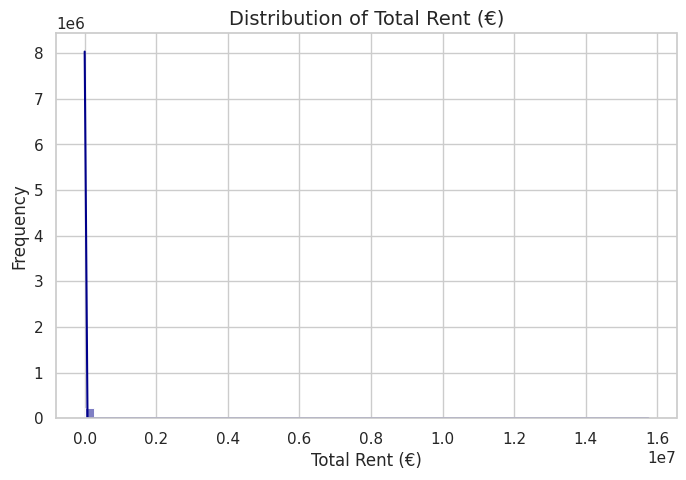

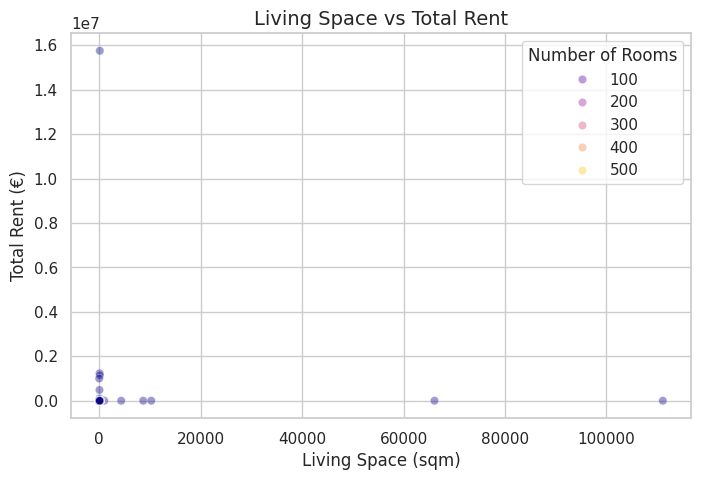

/tmp/ipython-input-4142094727.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


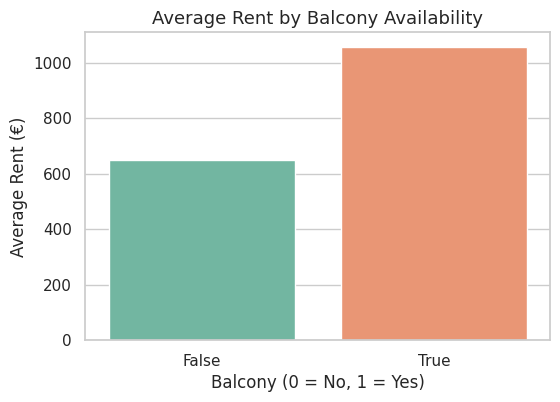

/tmp/ipython-input-4142094727.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


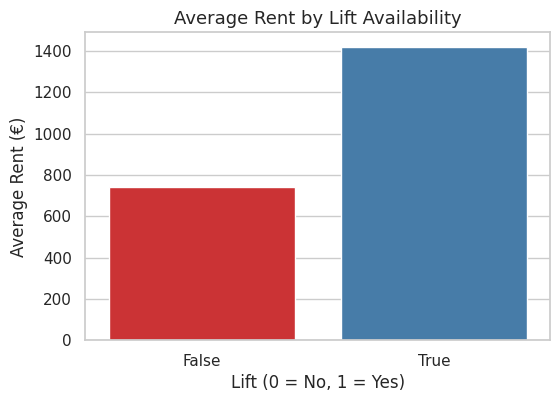

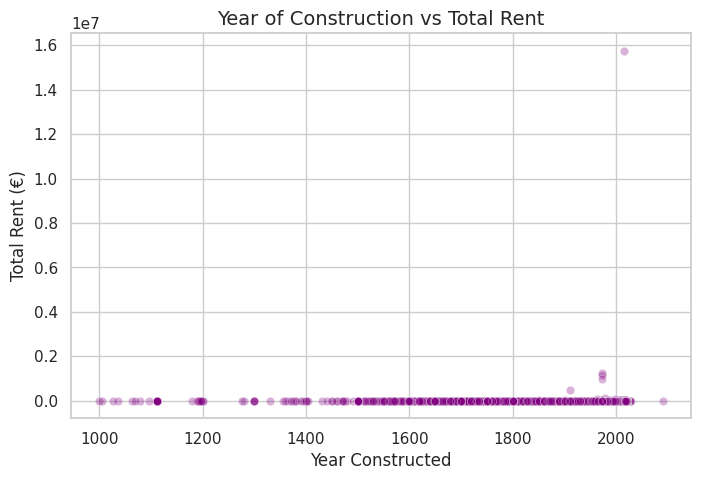

/tmp/ipython-input-4142094727.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


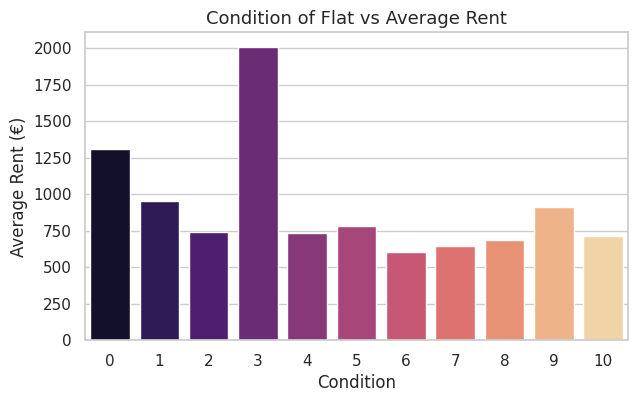

/tmp/ipython-input-4142094727.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


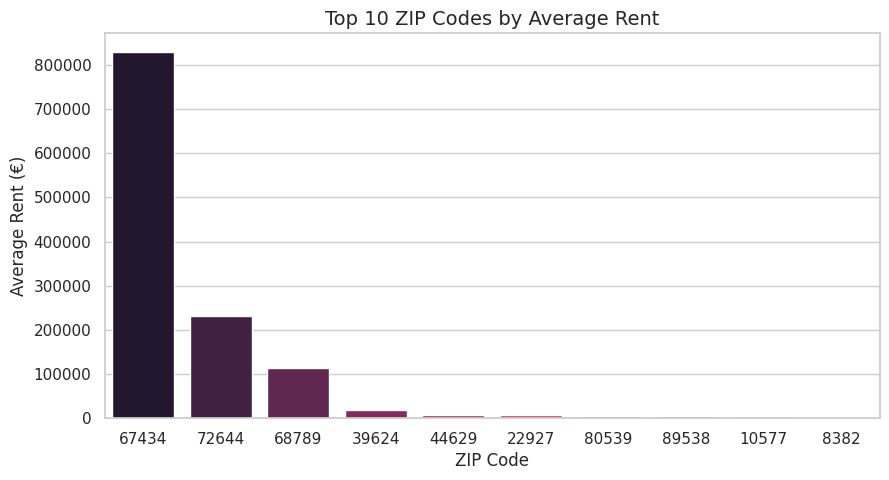

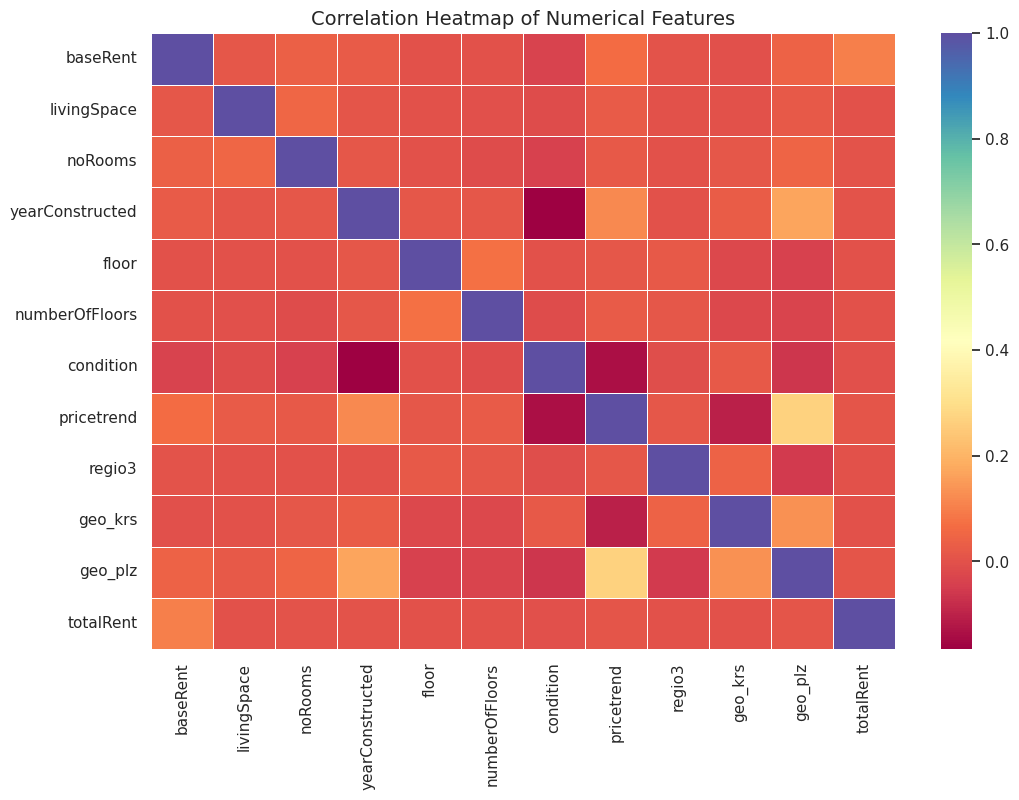

In [10]:
# 7. EXPLORATORY DATA ANALYSIS
# ==============================

sns.set_theme(style="whitegrid", palette="viridis")

# 1. Distribution of Total Rent
plt.figure(figsize=(8, 5))
sns.histplot(df["totalRent"], bins=60, kde=True, color="darkblue")
plt.title("Distribution of Total Rent (€)", fontsize=14)
plt.xlabel("Total Rent (€)")
plt.ylabel("Frequency")
plt.show()


# 2. Living Space vs Total Rent
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="livingSpace",
    y="totalRent",
    data=df,
    hue="noRooms",
    palette="plasma",
    alpha=0.4
)
plt.title("Living Space vs Total Rent", fontsize=14)
plt.xlabel("Living Space (sqm)")
plt.ylabel("Total Rent (€)")
plt.legend(title="Number of Rooms")
plt.show()


# 3. Balcony Availability vs Average Rent
plt.figure(figsize=(6, 4))
balcony_mean = df.groupby("balcony")["totalRent"].mean().reset_index()
sns.barplot(
    data=balcony_mean,
    x="balcony",
    y="totalRent",
    palette="Set2"
)
plt.title("Average Rent by Balcony Availability", fontsize=13)
plt.xlabel("Balcony (0 = No, 1 = Yes)")
plt.ylabel("Average Rent (€)")
plt.show()


# 4. Lift Availability vs Average Rent
plt.figure(figsize=(6, 4))
lift_mean = df.groupby("lift")["totalRent"].mean().reset_index()
sns.barplot(
    data=lift_mean,
    x="lift",
    y="totalRent",
    palette="Set1"
)
plt.title("Average Rent by Lift Availability", fontsize=13)
plt.xlabel("Lift (0 = No, 1 = Yes)")
plt.ylabel("Average Rent (€)")
plt.show()


# 6. Year Constructed vs Total Rent
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="yearConstructed",
    y="totalRent",
    data=df,
    color="purple",
    alpha=0.3
)
plt.title("Year of Construction vs Total Rent", fontsize=14)
plt.xlabel("Year Constructed")
plt.ylabel("Total Rent (€)")
plt.show()




# 8. Condition of Flat vs Average Rent
plt.figure(figsize=(7, 4))
condition_mean = df.groupby("condition")["totalRent"].mean().reset_index()
sns.barplot(
    data=condition_mean,
    x="condition",
    y="totalRent",
    palette="magma"
)
plt.title("Condition of Flat vs Average Rent", fontsize=13)
plt.xlabel("Condition")
plt.ylabel("Average Rent (€)")
plt.show()


# 9. Top 10 ZIP Codes by Average Rent
plt.figure(figsize=(10, 5))
zip_mean = df.groupby("geo_plz")["totalRent"].mean().sort_values(ascending=False).head(10)
sns.barplot(
    x=zip_mean.index.astype(str),
    y=zip_mean.values,
    palette="rocket"
)
plt.title("Top 10 ZIP Codes by Average Rent", fontsize=14)
plt.xlabel("ZIP Code")
plt.ylabel("Average Rent (€)")
plt.show()


# 10. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.select_dtypes(include=[np.number]).corr(),
    cmap="Spectral",
    annot=False,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


In [11]:
# 8. TRAIN / TEST SPLIT
# ==============================

X = df.drop("totalRent", axis=1)
y = df["totalRent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# 9. TRAIN ML MODELS
# ==============================

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }


Model Comparison:
                           MAE          RMSE        R2
Linear Regression  413.022063  73737.124824  0.000125
Random Forest      406.490358  73754.581086 -0.000349
Gradient Boosting  414.883820  73740.979641  0.000020


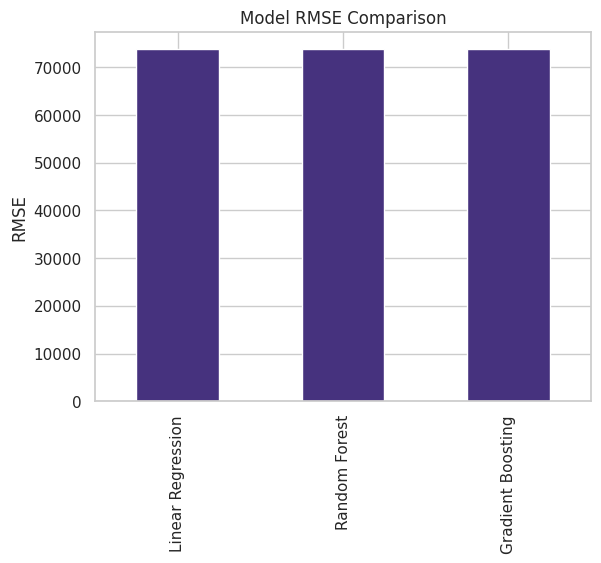

In [13]:
# 10. MODEL COMPARISON
# ==============================

results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)

plt.figure()
results_df["RMSE"].plot(kind="bar")
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")
plt.show()

In [14]:
# 11. PRICE TREND PREDICTION (UP / DOWN / SAME)
# ==============================

best_model_name = results_df["RMSE"].idxmin()
best_model = models[best_model_name]

df["predictedRent"] = best_model.predict(scaler.transform(X))
df["priceDirection"] = np.where(
    df["predictedRent"] > df["totalRent"] * 1.05, "Up",
    np.where(df["predictedRent"] < df["totalRent"] * 0.95, "Down", "Same")
)

trend_summary = df.groupby("geo_plz")["priceDirection"].value_counts().unstack().fillna(0)
print("\nPrice Trend by ZIP Code:\n", trend_summary.head())


Price Trend by ZIP Code:
 priceDirection   Down   Same     Up
geo_plz                            
852               0.0    0.0    1.0
853               1.0    0.0    0.0
1057              2.0    1.0    0.0
1067            165.0  362.0  126.0
1069             34.0   76.0   79.0


In [15]:
# 12. CONSENSUS TABLE (ALL MODELS AGREE)
# ==============================

predictions = pd.DataFrame(index=df.index)

for name, model in models.items():
    predictions[name] = model.predict(scaler.transform(X))

predictions["Consensus"] = np.where(
    predictions.std(axis=1) < 50, "Models Agree", "Models Disagree"
)

consensus_table = df[predictions["Consensus"] == "Models Agree"].head(10)
print("\nConsensus Prediction Rows:\n", consensus_table)


Consensus Prediction Rows:
     baseRent  livingSpace  noRooms  yearConstructed  floor  numberOfFloors  \
0     595.00        86.00      4.0           1965.0    1.0             3.0   
4     765.00        84.97      3.0           1950.0    1.0             3.0   
6     310.00        62.00      2.0           1972.0    1.0             4.0   
7     452.25        60.30      3.0           1959.0    2.0             3.0   
8     580.00        53.00      2.0           1970.0    2.0             2.0   
10    219.00        40.20      2.0           1930.0    3.0             3.0   
11    400.00        80.00      3.0           1892.0    1.0             3.0   
12    650.00       100.00      4.0           1912.0    2.0             3.0   
15    220.00        36.63      1.0           1990.0    4.0             5.0   
16    750.00        87.00      3.0           1972.0    2.0             3.0   

    balcony   lift  garden  cellar  condition  pricetrend  regio3  geo_krs  \
0     False  False    True    True

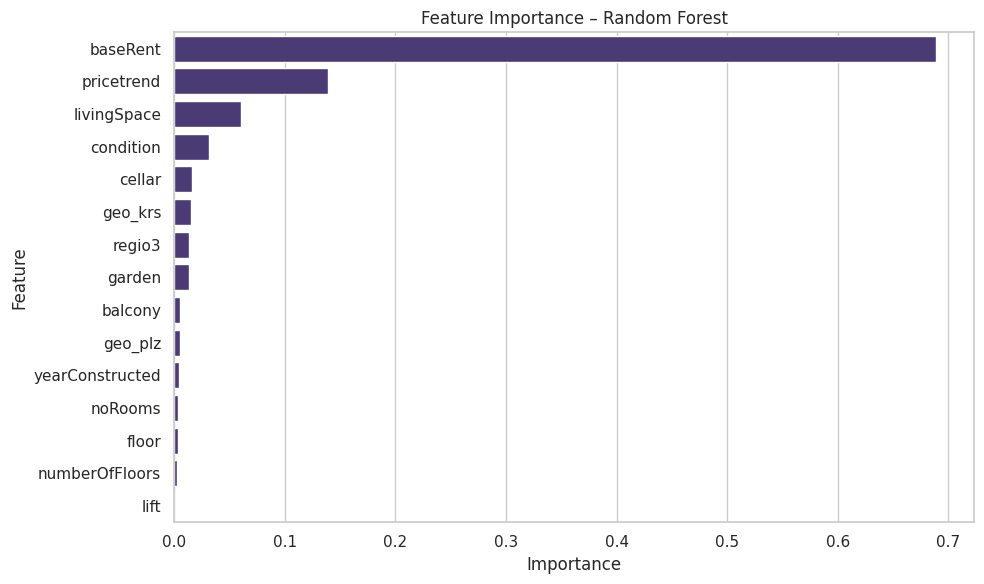

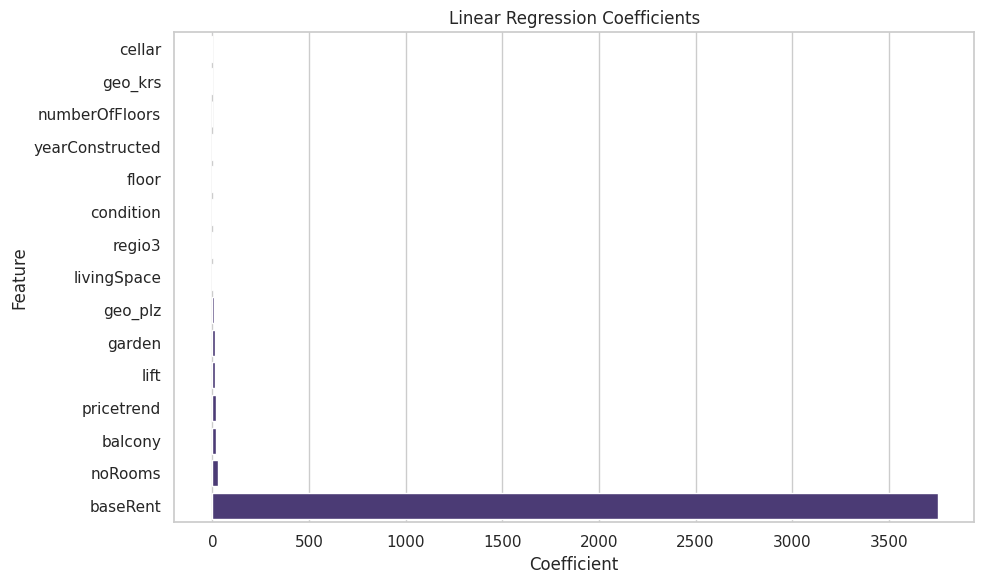

In [16]:
# 13. FEATURE IMPORTANCE
# ==============================

rf_model = models["Random Forest"]

importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(15),
    x="Importance",
    y="Feature"
)
plt.title("Feature Importance – Random Forest")
plt.tight_layout()
plt.show()


# LINEAR REGRESSION COEFFICIENTS

lr_model = models["Linear Regression"]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_df,
    x="Coefficient",
    y="Feature"
)
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()
